<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/nlp/vector_manipulation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector manipulation

## Transforming vectors

There are 3 main vector transformations;

- Scaling
- Translation
- Rotation

The rotation operation changes the direction of a vector, letting unaffected its dimensionality and its norm. Let us explain with some examples. 

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Procedure to plot and arrows that represents vectors with pyplot
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)


## Example 1

In [3]:
R = np.array([[2, 0], [0, -2]])

In [4]:
x = np.array([[1, 1]])

The dot product between a vector and a square matrix produces a rotation and a scaling of the original vector.

Remember that our recommended way to get the dot product in Python is np.dot(a, b):

In [5]:
a1 = np.arange(200000)
a2 = np.arange(200000, 400000)

In [6]:
%timeit np.dot(a1, a2)

10000 loops, best of 3: 175 µs per loop


In [7]:
%timeit a1.dot(a2)

10000 loops, best of 3: 171 µs per loop


In [8]:
y = np.dot(x, R)
y

array([[ 2, -2]])

We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. 

Now we can plot the vector $\vec x = [1, 1]$ in a cartesian plane. The cartesian plane will be centered at `[0,0]` and its x and y limits will be between `[-4, +4]`

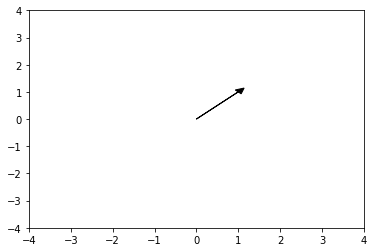

In [9]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')

Now, let's plot in the same system our vector $\vec x = [1, 1]$ and its dot product with the matrix

$$Ro = \begin{bmatrix} 2 & 0 \\ 0 & -2 \end{bmatrix}$$

$$y = x \cdot Ro = [[2, -2]]$$

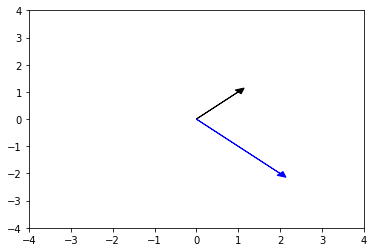

In [10]:
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

Note that the output vector `y` is transformed in another vector.

### Example 2

We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. For that, we have created a function that takes care of all the intricate parts of the visual formatting. The following procedure plots an arrow within a Pyplot canvas.

Data that is composed of 2 real attributes is telling to belong to a $ RxR $ or $ R^2 $ space. Rotation matrices in $R^2$ rotate a given vector $\vec x$ by a counterclockwise angle $\theta$ in a fixed coordinate system. Rotation matrices are of the form:

$$Ro = \begin{bmatrix} cos \theta & -sin \theta \\ sin \theta & cos \theta \end{bmatrix}$$

The trigonometric functions in Numpy require the angle in radians, not in degrees. In the next cell, we define a rotation matrix that rotates vectors by $45^o$.

In [22]:
angle = 45 * (np.pi / 180) #convert degrees to radians

Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

x2 = np.array([2, 2]).reshape(1, -1) # make it a row vector
y2 = np.dot(x2, Ro)

print('Rotation matrix')
print(Ro)
print('\nRotated vector')
print(y2)

print('\n x2 norm', np.linalg.norm(x2))
print('\n y2 norm', np.linalg.norm(y2))
print(f'\n Rotation matrix norm (sqrt(2)={math.sqrt(2)}): ', np.linalg.norm(Ro))

Rotation matrix
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Rotated vector
[[2.82842712e+00 2.22044605e-16]]

 x2 norm 2.8284271247461903

 y2 norm 2.82842712474619

 Rotation matrix norm (sqrt(2)=1.4142135623730951):  1.4142135623730951


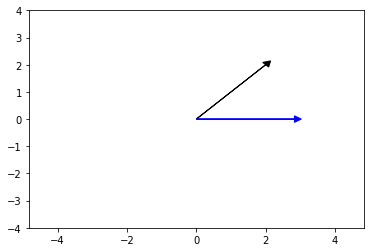

In [18]:
plot_vectors([x2, y2], fname='transform_02.svg')

Some points to note:

* The norm of the input vector is the same as the norm of the output vector. Rotations matrices do not modify the norm of the vector, only its direction.
* The norm of any $R^2$ rotation matrix is always $\sqrt 2 = 1.414221$

## Frobenius Norm

The Frobenius norm is the generalization to $R^2$ of the already known norm function for vectors 

$$\| \vec a \| = \sqrt {{\vec a} \cdot {\vec a}} $$

For a given $R^2$ matrix A, the frobenius norm is defined as:

$$\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}$$

In [23]:
A = np.array([[2, 2], [2, 2]])

`np.square()` is a way to square each element of a matrix. It must be equivalent to use the * operator in numpy arrays.

In [24]:
A_squared = np.square(A)
A_squared

array([[4, 4],
       [4, 4]])

Now we can sum over the elements of the resulting array, and then get the square root of the sum.

In [26]:
A_Forbenius = np.sqrt(np.sum(np.square(A)))
A_Forbenius

4.0

That was the extended version of the `np.linalg.norm()` function. You can check that it yields the same result.

In [27]:
np.linalg.norm(A)

4.0

In [28]:
print('Froberius norm of the Rotation matrix...')
print(np.sqrt(np.sum(Ro * Ro)), ' == ', np.linalg.norm(Ro))

Froberius norm of the Rotation matrix...
1.4142135623730951  ==  1.4142135623730951
